In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/amazon-sales-data-analysis/Amazon Sale Report.csv')

In [3]:
df.shape

(128976, 21)

In [4]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [5]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [7]:
df.drop(['New','PendingS', 'fulfilled-by'], axis=1, inplace = True)

In [8]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False


## Data Cleaning & Transformation

In [9]:
df.isnull().sum()

index                    0
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency              7800
Amount                7800
ship-city               35
ship-state              35
ship-postal-code        35
ship-country            35
B2B                      0
dtype: int64

In [10]:
df.drop(['currency'], axis=1, inplace = True)

In [11]:
# dropped 4 columns fulfilled, New, PendingS, currency
df.shape

(128976, 17)

In [12]:
df.isnull().sum()

index                    0
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
Amount                7800
ship-city               35
ship-state              35
ship-postal-code        35
ship-country            35
B2B                      0
dtype: int64

In [13]:
df = df.dropna(subset=['ship-postal-code'])

In [14]:
df = df.dropna(subset=['ship-city', 'ship-state'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128941 entries, 0 to 128975
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128941 non-null  int64  
 1   Order ID            128941 non-null  object 
 2   Date                128941 non-null  object 
 3   Status              128941 non-null  object 
 4   Fulfilment          128941 non-null  object 
 5   Sales Channel       128941 non-null  object 
 6   ship-service-level  128941 non-null  object 
 7   Category            128941 non-null  object 
 8   Size                128941 non-null  object 
 9   Courier Status      128941 non-null  object 
 10  Qty                 128941 non-null  int64  
 11  Amount              121143 non-null  float64
 12  ship-city           128941 non-null  object 
 13  ship-state          128941 non-null  object 
 14  ship-postal-code    128941 non-null  float64
 15  ship-country        128941 non-null  ob

In [16]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B'],
      dtype='object')

In [17]:
# converting datatype of ship-postal-code
df['ship-postal-code'] = df['ship-postal-code'].astype('int')

In [18]:
df['ship-postal-code'].dtype

dtype('int64')

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipykernel_18/2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [20]:
df['Date'].dtype

dtype('<M8[ns]')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128941 entries, 0 to 128975
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128941 non-null  int64         
 1   Order ID            128941 non-null  object        
 2   Date                128941 non-null  datetime64[ns]
 3   Status              128941 non-null  object        
 4   Fulfilment          128941 non-null  object        
 5   Sales Channel       128941 non-null  object        
 6   ship-service-level  128941 non-null  object        
 7   Category            128941 non-null  object        
 8   Size                128941 non-null  object        
 9   Courier Status      128941 non-null  object        
 10  Qty                 128941 non-null  int64         
 11  Amount              121143 non-null  float64       
 12  ship-city           128941 non-null  object        
 13  ship-state          128941 non-nul

In [22]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B'],
      dtype='object')

In [23]:
#renaming column
df.rename(columns = {'Qty':'Quantity'}, inplace =  True)

In [24]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B'],
      dtype='object')

In [25]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,400081,IN,False
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,560085,IN,False
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073,IN,False


In [26]:
#describe function only works on the numerical data
df.describe()

,index,Date,Quantity,Amount,ship-postal-code
count,128941.000000,128941,128941.000000,121143.000000,128941.000000
mean,64487.286340,2022-05-12 11:51:10.306574336,0.904414,648.576874,463945.677744
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,32247.000000,2022-04-20 00:00:00,1.000000,449.000000,382421.000000
50%,64486.000000,2022-05-10 00:00:00,1.000000,605.000000,500033.000000
75%,96731.000000,2022-06-04 00:00:00,1.000000,788.000000,600024.000000
max,128974.000000,2022-06-29 00:00:00,15.000000,5584.000000,989898.000000
std,37231.274722,NaN,0.313356,281.196896,191458.488954


In [27]:
#describe(include=object) function works for string data
df.describe(include=object)

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,ship-city,ship-state,ship-country
count,128941,128941,128941,128941,128941,128941,128941,128941,128941,128941,128941
unique,120201,13,2,2,2,9,11,4,8948,69,1
top,403-4984515-8861958,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,BENGALURU,MAHARASHTRA,IN
freq,12,77797,89691,128817,88608,50280,22366,109458,11208,22272,128941


In [28]:
# we can also use 'describe' function this way to find the stats of any particular columns
df[['Quantity','Amount']].describe()

,Quantity,Amount
count,128941.000000,121143.000000
mean,0.904414,648.576874
std,0.313356,281.196896
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,15.000000,5584.000000


In [29]:
df['Amount'].sum()

78570548.25

In [30]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B'],
      dtype='object')

# Exploratory Data Analysis

### 1) Count of different Sizes of clothing products available.

<Figure size 1000x500 with 0 Axes>

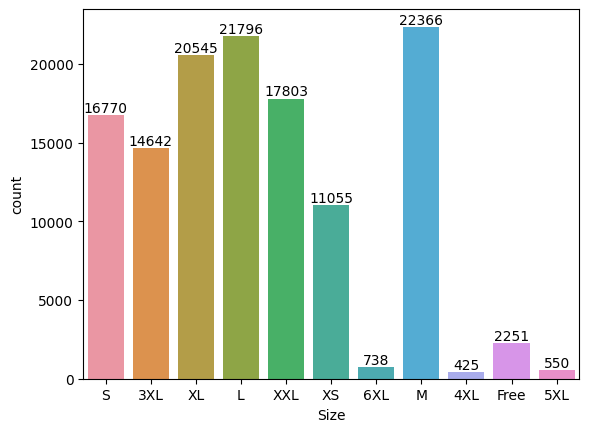

<Figure size 1000x500 with 0 Axes>

In [31]:
ax = sns.countplot(x='Size', data=df)
order = df['Size'].value_counts().index

for bars in ax.containers:
    ax.bar_label(bars)
plt.figure(figsize=(10,5))

***From the above graph it is evident that M-sized clothes have been purchased the most.***

### 2) Total no. of products available in each size.

Text(0.5, 1.0, 'Quantity of Cloth available in each sizes')

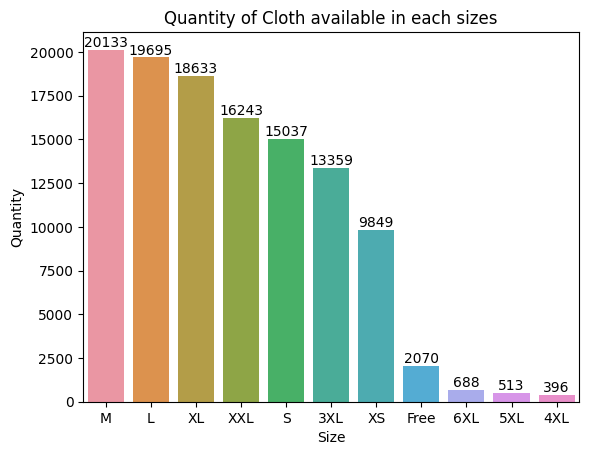

In [32]:
qty = df.groupby('Size', as_index= False)['Quantity'].sum().sort_values(by = 'Quantity', ascending = False)
ax = sns.barplot(x='Size', y='Quantity', data=qty)
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Quantity of Cloth available in each sizes')

***The top 3 available sizes in the inventory are M, L and XL***

### 3) Courier Status with respect to Delivery Status

Text(0.5, 1.0, 'Courier Status')

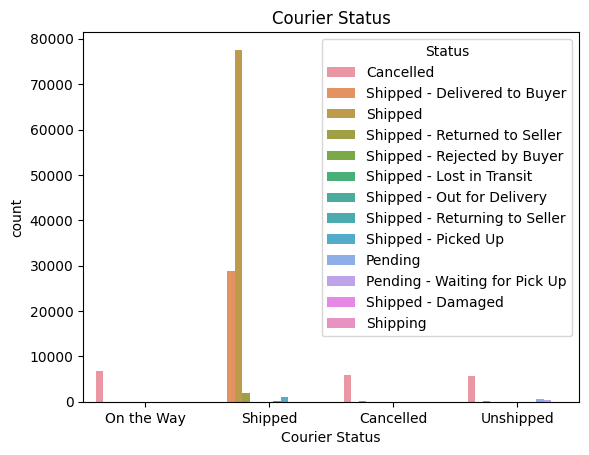

In [33]:
ax = sns.countplot(data=df, x='Courier Status', hue='Status')
#plt.figure(figsize=(20,6))
plt.title('Courier Status')

***Maximum of the producst have been shipped and delivered to buyer.***

### Order Status

Text(0.5, 1.0, 'Orders Status')

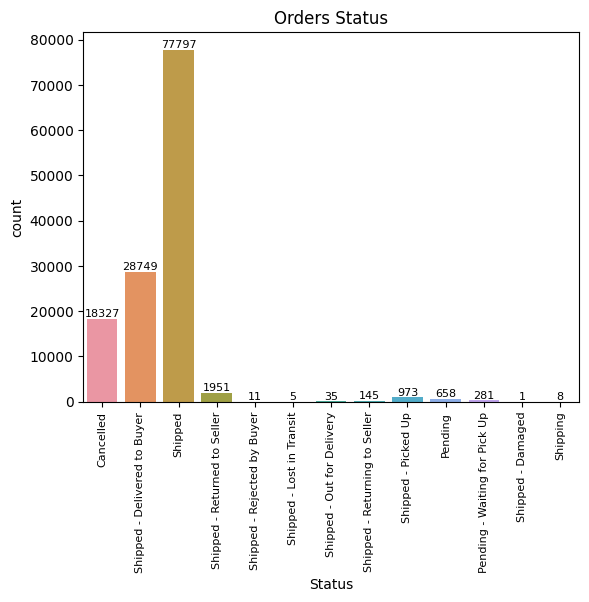

In [34]:
ax = sns.countplot(x='Status', data = df)

for bars in ax.containers:
  ax.bar_label(bars, fontsize=8)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
plt.title('Orders Status')

### 4) Top selling Product Category

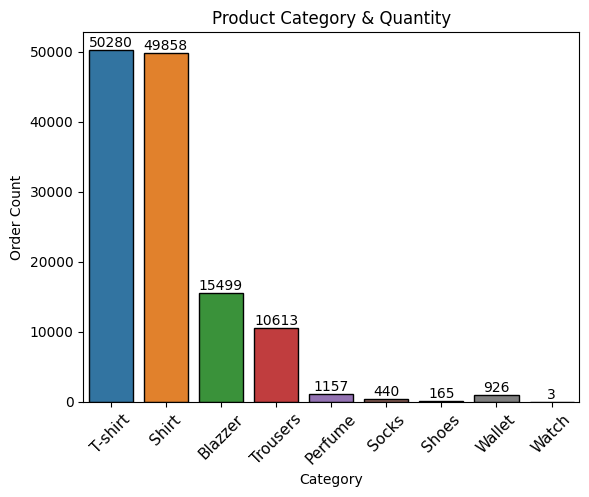

In [35]:
ax = sns.countplot(x='Category', data = df, edgecolor = 'Black')
for bars in ax.containers:
  ax.bar_label(bars, fmt='%.0f')         # Use '%.0f' to format as integer

# Set labels
plt.xlabel('Category')
plt.ylabel('Order Count')
plt.xticks(rotation=45, fontsize=11)
plt.title('Product Category & Quantity')

# Show the plot
plt.show()

***T-shirts and Shirts are the most high demand categories of Products.***

***50280 number of orders have been placed for T-shirt, followed by 49858 orders have been palced for Shirts.***

### 5) B2B or Retailer based business

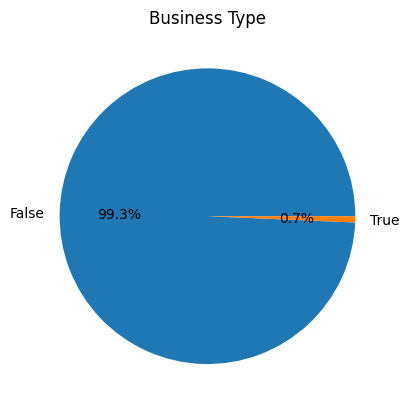

In [36]:
# Checking B2B Data  by using pie chart
B2B_Check = df['B2B'].value_counts()

#  Plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check.index, autopct='%1.1f%%')
plt.title('Business Type')
plt.show()

***99.3% are retailers and 0.7% are buyers***

In [37]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B'],
      dtype='object')

### 6) Who is fulfilling orders the most?

Text(0.5, 1.0, 'Order Fulfillment')

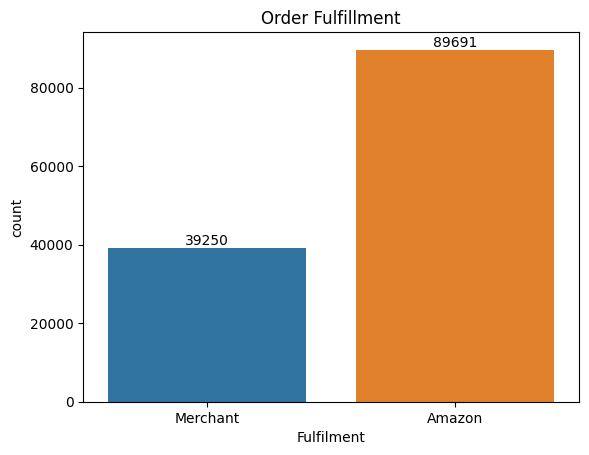

In [38]:
ax = sns.countplot(x='Fulfilment', data=df)
for bars in ax.containers:
  ax.bar_label(bars)

plt.title('Order Fulfillment')

***Maximum orders are fulfilled by Amazon.***

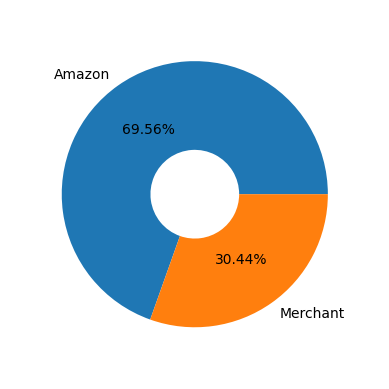

In [39]:
# same visulaisation with pie chart

pie =  df['Fulfilment'].value_counts()
fig, ax = plt.subplots()

ax.pie(pie, labels=pie.index, autopct='%1.2f%%', radius=0.9, wedgeprops=dict(width=0.6))
ax.set(aspect="equal")

plt.show()

### 7) Products availability on the basis of their Sizes

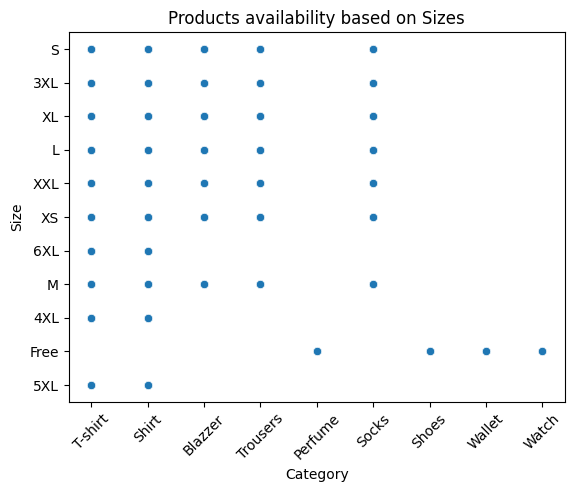

In [40]:
ax = sns.scatterplot(x='Category', y='Size', data=df)

# Rotate x tick labels
plt.xticks(rotation=45)

# Set labels
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Products availability based on Sizes')

plt.show()

***T-Shirts and Shirts are not available in Free size.***

### 8) a. Top 10 highest revenue generating states

In [41]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B'],
      dtype='object')

Text(0.5, 1.0, 'Revenue by States')

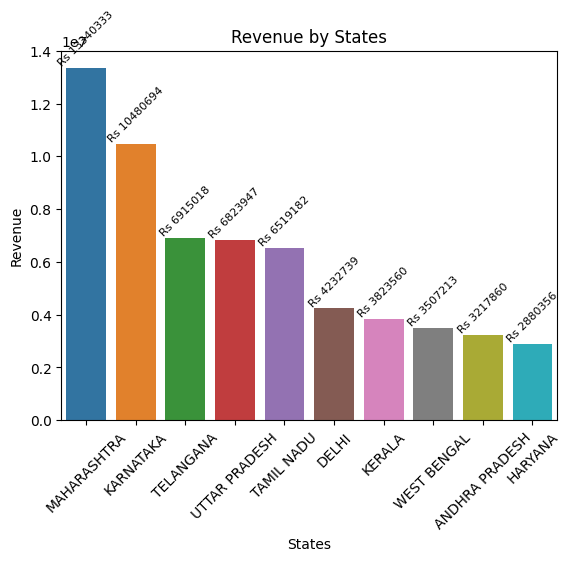

In [42]:
revenue = df.groupby(['ship-state'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
ax = sns.barplot(x='ship-state', y='Amount', data = revenue)

for bars in ax.containers:
  ax.bar_label(bars, fmt='Rs %.0f', fontsize=8, rotation = 45)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10)

plt.xlabel('States')
plt.ylabel('Revenue')
plt.title("Revenue by States")


***Maharashtra, Karnataka, Telangana are the top 3 highest revenue generating States.***

### 8) b. Top 10 states placing maximum no. of orders

Text(0.5, 1.0, 'Orders by States')

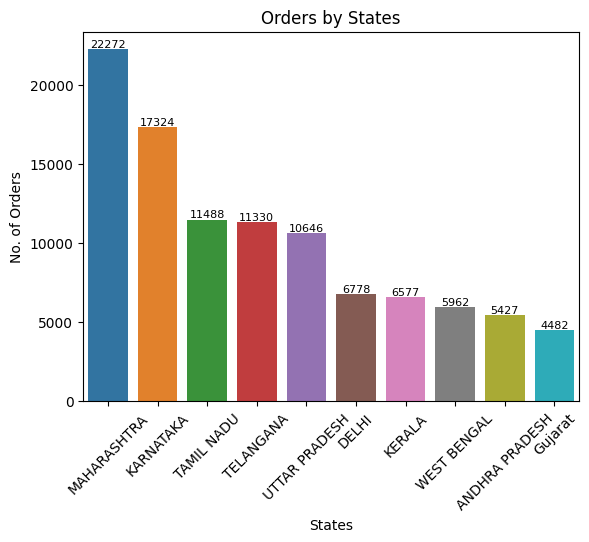

In [43]:
orders_placed = df.groupby(['ship-state'], as_index = False)['Order ID'].count().sort_values(by = 'Order ID', ascending = False).head(10)
ax = sns.barplot(x='ship-state', y='Order ID', data = orders_placed)

for bars in ax.containers:
  ax.bar_label(bars, fontsize=8)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45, fontsize=10)

#plt.figure(figsize=(15,5))
plt.xlabel('States')
plt.ylabel('No. of Orders')
plt.title('Orders by States')

***Maharashtra, Karnataka and Tamil Nadu are the top 3 states placing maximum no. or orders.***

### 9) Top 10 Cities generating maximum revenue and placing maximum orders

Text(0, 0.5, 'Revenue')

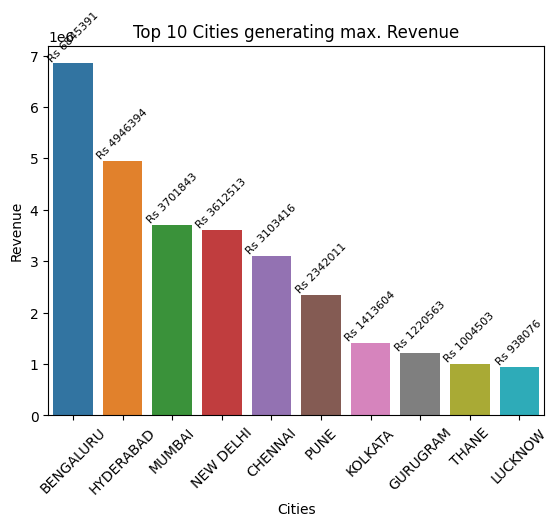

In [44]:
#by total revenue
city = df.groupby('ship-city', as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
ax = sns.barplot(x='ship-city', y='Amount', data = city)

for bars in ax.containers:
  ax.bar_label(bars, fmt='Rs %.0f', fontsize=8, rotation =45)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45, fontsize=10)

#plt.figure(figsize=(15,5))
plt.title('Top 10 Cities generating max. Revenue')
plt.xlabel('Cities')
plt.ylabel('Revenue')


Text(0, 0.5, 'No. of Orders')

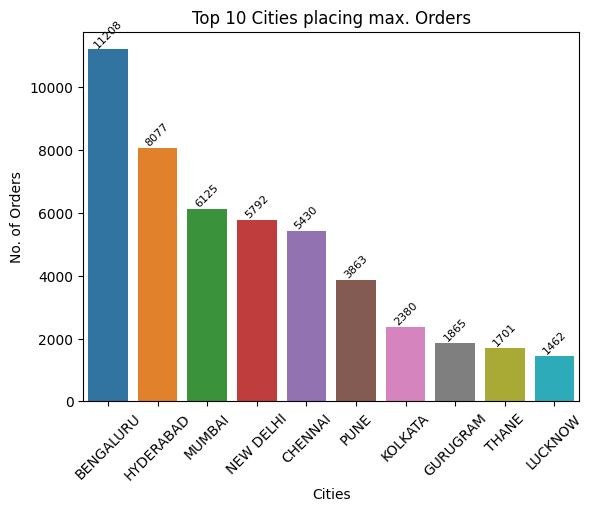

In [45]:
#by total no. of orders city wise
city_orders = df.groupby('ship-city', as_index = False)['Order ID'].count().sort_values(by = 'Order ID', ascending = False).head(10)
ax = sns.barplot(x='ship-city', y='Order ID', data = city_orders)

for bars in ax.containers:
  ax.bar_label(bars, fontsize=8, rotation =45)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45, fontsize=10)

#plt.figure(figsize=(15,5))
plt.title('Top 10 Cities placing max. Orders')
plt.xlabel('Cities')
plt.ylabel('No. of Orders')


***Bengaluru, Hyderabad and Mumbai are the top 3 cities generating maximum revenue and placing maximum no. of orders.***

### 10) Revenue generated from each product category

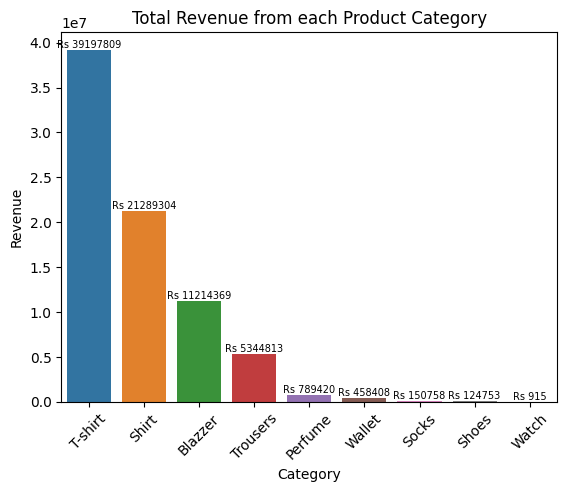

In [46]:
product = df.groupby('Category', as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)
ax = sns.barplot(x='Category', y='Amount', data=product)

for bars in ax.containers:
  ax.bar_label(bars, fmt= 'Rs %.0f', fontsize=7)

plt.xlabel('Category')
plt.ylabel('Revenue')
plt.title('Total Revenue from each Product Category')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, fontsize=10)
plt.show()

***T-Shirt and Shirt  have generated the maximum revenue.***

In [47]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B'],
      dtype='object')

### 12) Different Sales Channels

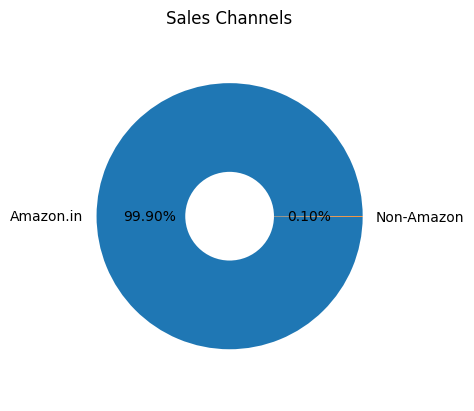

In [48]:
pie =  df['Sales Channel'].value_counts()
fig, ax = plt.subplots()

plt.title('Sales Channels')
ax.pie(pie, labels=pie.index, autopct='%1.2f%%', radius=0.9, wedgeprops=dict(width=0.6))
ax.set(aspect="equal")

plt.show()

***Amazon.in is the most preferred channel.***

### 13) Type of Service given

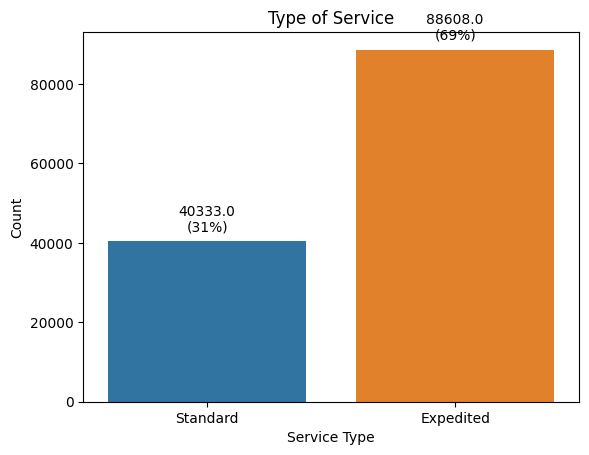

In [49]:
ax = sns.countplot(x='ship-service-level', data = df)

# Calculate total number of orders
total = len(df)

# Add labels to each bar
for bar in ax.patches:
    height = bar.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{height}\n({percentage:.0f}%)',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # Offset label position by 5 points
                textcoords='offset points',
                ha='center',
                va='bottom',
                fontsize=10)

plt.title('Type of Service')
plt.xlabel('Service Type')
plt.ylabel('Count')
plt.show()

***69% orders were expedited and 31% were of Standard type.***

### 14) Total Order count in each month.

In [50]:
# Extract month from date
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group by 'YearMonth' and count the number of 'Order ID'
monthly_orders = df.groupby('YearMonth')['Order ID'].count().reset_index()

# Rename columns for clarity
monthly_orders.columns = ['Month', 'Order Count']

print(monthly_orders)

     Month  Order Count
0  2022-03          171
1  2022-04        49053
2  2022-05        42028
3  2022-06        37689


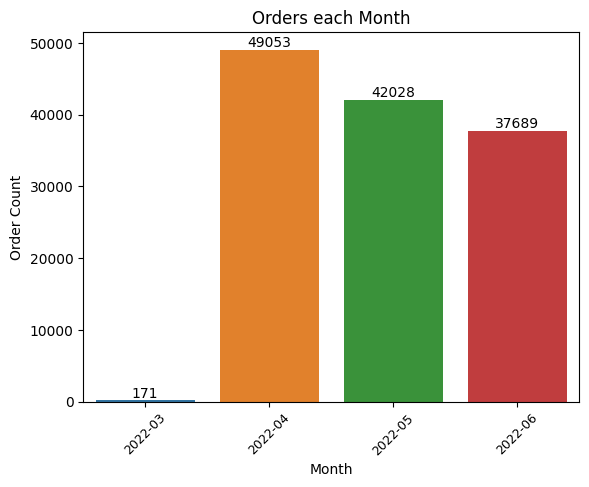

In [51]:
ax = sns.barplot(x='Month', y='Order Count', data=monthly_orders)

# Add labels to each bar
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', fontsize=10)


plt.xticks(rotation=45, fontsize=9)

plt.title('Orders each Month')
plt.xlabel('Month')
plt.ylabel('Order Count')


plt.show()

***Maximum no. of orders were placed in April - May 2022.***